# Alberto Otero Villarmea

# Exercicio EDA

## EDA - Wine Reviews

### Descripción inicial do dataset
Este dataset conte unha lista de reviews de viños que se empregaria para crear un modelo predictivo.

[Link ao dataset](https://www.kaggle.com/zynicide/wine-reviews)

O data set esta formado polas seguintes columnas:
* **country:** El país de procedencia del vino
* **description:**	Descripción del las caracteristicas del vino.
* **designation:** El viñedo dentro de la bodega de donde proceden las uvas con las que se elabora el vino.
* **points:**	La cantidad de puntos que WineEnthusiast calificó al vino en una escala de 1 a 100.
* **price:** Precio de la botella de vino.
* **province:** La provincia o estado de donde proviene el vino.
* **region_1:** El área vitivinícola en una provincia o estado.
* **region_2:** A veces hay regiones más específicas especificadas dentro de un área vitivinícola.
* **taster_name:**	Nombre del catador de vino.
* **taster_twitter_handle:** Usuario de twitter del catador de vino.
* **title:** El título de la reseña del vino, que a menudo contiene la añada si está interesado en extraer esa característica.
* **variety:**	El tipo de uvas utilizadas para hacer el vino .
* **winery:** La bodega que hizo el vino.



## Imports

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 # Procesado dos datos

Antes de empezar el analisis debemos conocer el dataset.

In [2]:
#Cargamos los datos
data=pd.read_csv('winemag-data-130k-v2.csv')

In [3]:
#Elimminamos la culumna de indice que trae por defecto el dataset
data=data.drop(columns=['Unnamed: 0'])
data=data.reset_index(drop=True)

In [4]:
#Mostramos las 10 primeras columnas
data.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [5]:
#listamos a colunas
columns = list(data.columns)
columns

['country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery']

In [6]:
#Consultamos os tipos de datos e   se hai valores nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [7]:
data.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [8]:
data.shape

(129971, 13)

In [9]:
#Separamos os valores categoricos dos valores numericos en duas lista independientes.

cats = list(data.select_dtypes(include=['object']).columns)
nums = list(data.select_dtypes(exclude=['object']).columns)
print (f'Variables categóricas : {cats}')
print (f'Variables categóricas : {nums}')

Variables categóricas : ['country', 'description', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']
Variables categóricas : ['points', 'price']


In [10]:
#Consultamos o número de valores difernetes en cada columna
data.nunique(axis=0)

country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

In [11]:
#Calculamos el total de valores nulos que hay en cada columna y el porcentaje de la columna que tiene valores nulos
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_datatotal = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
region_2,79460,61.136715
designation,37465,28.825661
taster_twitter_handle,31213,24.015357
taster_name,26244,20.192197
region_1,21247,16.347493
price,8996,6.921544
country,63,0.048472
province,63,0.048472
variety,1,0.000769
description,0,0.000000


In [12]:
#Observamos que la mayoria de valores nulos estan en las columnas de regíon,designation, noombre del probador y precio
#Lo mas preocupante son los valores nulos en la columna de precio, puesto que no queremos predecir esos valores.
#Por lo tanto de moento solo eliminaremos las filas que tienen valores nulos en en la columna de precio
data=data.dropna(subset=['price'])
data=data.reset_index(drop=True)

In [13]:
#Hechammos un vistazo a los vinos mas caros
data[(data['price']>2200)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
14744,France,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus
74674,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
91549,France,"A superb wine from a great year, this is power...",NaN,96,2500.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair


Observamos que los 3 vinos mas caros son Francese

In [14]:
#Comprobamos que hay muchos archivos duplicados
data[data.duplicated("description", keep=False)].sort_values("description")

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
62787,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
43230,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
67043,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
111381,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
51556,US,A 100% varietal wine fermented in stainless st...,Woods Vineyard Rosé of,88,29.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Ousterhout 2015 Woods Vineyard Rosé of Pinot N...,Pinot Noir,Ousterhout
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31720,Italy,“Fresh and dry” is what the wine label adverti...,White Label,84,23.0,Piedmont,Gavi,NaN,NaN,NaN,La Scolca 2006 White Label (Gavi),Cortese,La Scolca
81768,Italy,"“Il Bugiardo,” which is Italian for “the liar,...",Il Bugiardo,88,36.0,Veneto,Valpolicella Classico Superiore Ripasso,NaN,NaN,NaN,Buglioni 2009 Il Bugiardo (Valpolicella Class...,"Corvina, Rondinella, Molinara",Buglioni
120812,Italy,"“Il Bugiardo,” which is Italian for “the liar,...",Il Bugiardo,88,36.0,Veneto,Valpolicella Classico Superiore Ripasso,NaN,NaN,NaN,Buglioni 2009 Il Bugiardo (Valpolicella Class...,"Corvina, Rondinella, Molinara",Buglioni
85593,Canada,"“Open and drink” the instructions should read,...",NaN,89,20.0,British Columbia,Okanagan Valley,NaN,Paul Gregutt,@paulgwine,Quails' Gate 2012 Chardonnay (Okanagan Valley),Chardonnay,Quails' Gate


In [15]:
#Eliminando todos los duplicados idemtificandolos por la descripcion
data = data.drop_duplicates("description")
print(data.shape)

(111567, 13)


# Visualizacion de datos

In [16]:
#Hacemmos una funcion para tener definodos los parametros de los histogramas
def pastel_plot(data, x, y):
    plt.figure(figsize = (15,6))
    plt.title('histograma de puntos')
    sns.set_color_codes("pastel")
    sns.barplot(x = x, y=y, data=df)
    locs, labels = plt.xticks()
    plt.show()

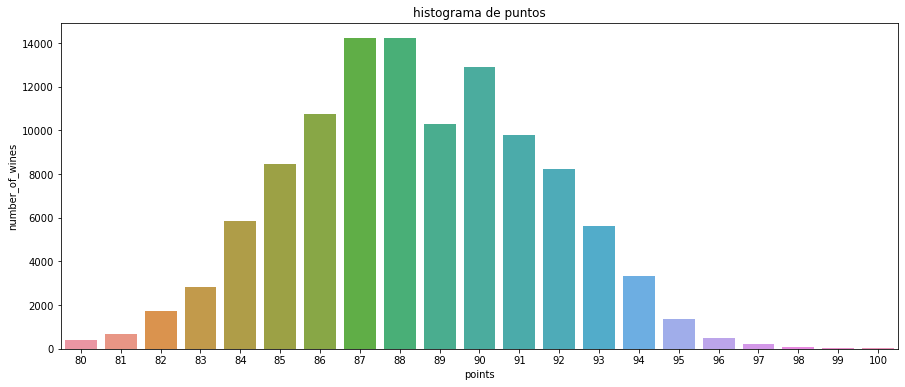

In [17]:
temp = data["points"].value_counts()
df = pd.DataFrame({'points': temp.index,
                   'number_of_wines': temp.values
                  })

pastel_plot(df,'points', 'number_of_wines')

Como podemos observar la puntuacion de los vinos va desde 80 a 100 puntos estando la mayoria de vinos entre 87 y 88 puntos

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


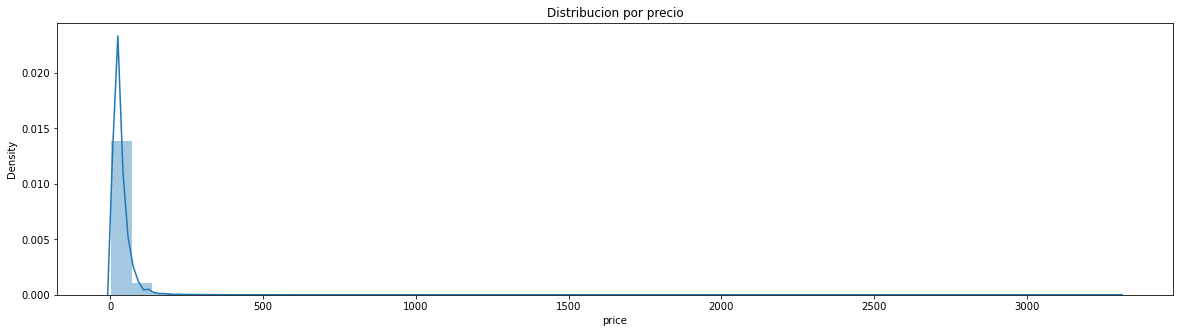

In [18]:
#Tambien podemmos ver la distribucion en funcion de los precios y cantidad de vinos con esos precios
plt.figure(figsize=(20,5))
plt.title("Distribucion por precio")
ax = sns.distplot(data["price"])

Como podemos ver no se ve muy bien la distribucion de vinos por precios ya que los precios va desde 0 hasta mas de 3000 por lo que no podemos apreciar bien el histoograma

Para solucionar esto soloo mostraremos en el histograma los vinos con un precio inferior a 200 para asi analizarlo bien.

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Hay: 0.5960543888425789 % de vinos mas caros que  200 USD


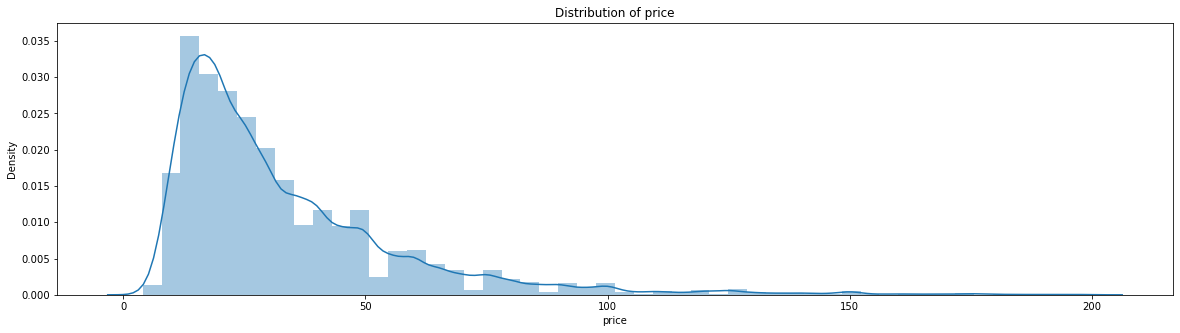

In [20]:
plt.figure(figsize=(20,5))
plt.title("Distribution of price")
ax = sns.distplot(data[data["price"]<200]['price'])

percent=data[data['price']>200].shape[0]/data.shape[0]*100
print("Hay:", percent, "% de vinos mas caros que  200 USD")

Como podemos ver, sólo perdemos un 0.59 de los vinos y ahora podemos ver la distribción de los precios

Text(0, 0.5, 'Precio')

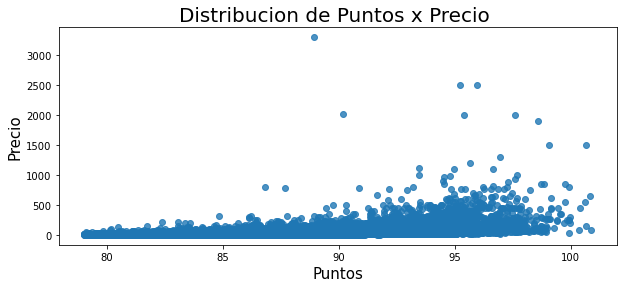

In [38]:
plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price', data=data, x_jitter=True, fit_reg=False)
g.set_title("Distribucion de Puntos x Precio ", fontsize=20)
g.set_xlabel("Puntos", fontsize= 15)
g.set_ylabel("Precio", fontsize= 15)

Diagrama de dispersión muy significativo.

- Los valores más altos no son del vino con mayor puntuación.
- Los vinos más caros tienen una puntuación entre 87 y 90

In [51]:
#Investigamos los paises que tiene los vinos mas caros y mejoor valorados
z=data.groupby(['country'])['price','points'].mean().reset_index().sort_values('price',ascending=False)
z[['country','price']].head(n=10)

C:\Users\alber\AppData\Local\Temp/ipykernel_17144/4281476810.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  z=data.groupby(['country'])['price','points'].mean().reset_index().sort_values('price',ascending=False)


,country,price
37,Switzerland,72.833333
13,England,52.677966
16,Germany,43.460789
18,Hungary,42.234375
14,France,41.994105
21,Italy,39.928027
39,US,36.697346
7,Canada,35.776786
2,Australia,35.686491
20,Israel,31.770419


[Text(0, 0, 'US'),
 Text(1, 0, 'France'),
 Text(2, 0, 'Italy'),
 Text(3, 0, 'Spain'),
 Text(4, 0, 'Portugal'),
 Text(5, 0, 'Chile'),
 Text(6, 0, 'Argentina'),
 Text(7, 0, 'Austria'),
 Text(8, 0, 'Australia'),
 Text(9, 0, 'Germany'),
 Text(10, 0, 'New Zealand'),
 Text(11, 0, 'South Africa'),
 Text(12, 0, 'Israel'),
 Text(13, 0, 'Greece'),
 Text(14, 0, 'Canada'),
 Text(15, 0, 'Bulgaria'),
 Text(16, 0, 'Hungary'),
 Text(17, 0, 'Romania'),
 Text(18, 0, 'Uruguay'),
 Text(19, 0, 'Turkey'),
 Text(20, 0, 'Georgia'),
 Text(21, 0, 'Slovenia'),
 Text(22, 0, 'Croatia'),
 Text(23, 0, 'Mexico'),
 Text(24, 0, 'England')]

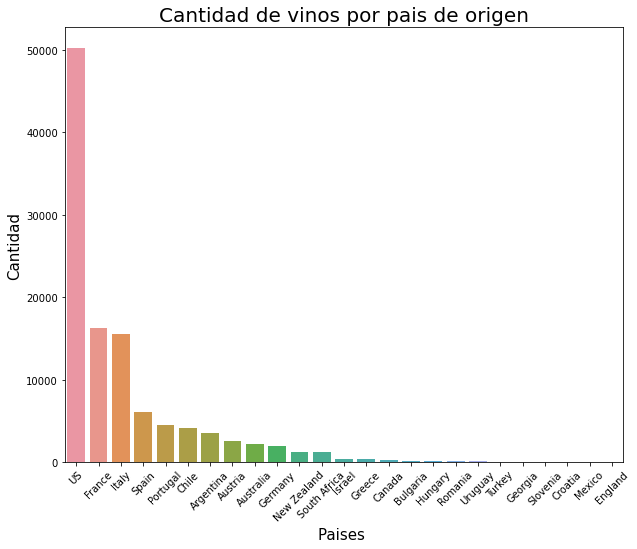

In [69]:
# Veamos cuantos vinos hay en el dataset de cada país
country = data.country.value_counts()[:25]
plt.figure(figsize=(10,8))
vinoscount = sns.countplot(x='country', data=data[data.country.isin(country.index.values)], order=data['country'].value_counts().index[:25])
vinoscount.set_title("Cantidad de vinos por pais de origen", fontsize=20)
vinoscount.set_xlabel("Paises ", fontsize=15)
vinoscount.set_ylabel("Cantidad", fontsize=15)
vinoscount.set_xticklabels(vinoscount.get_xticklabels(),rotation=45)


Como podemos comprobar a maioria de datos son de viños estadounidenses

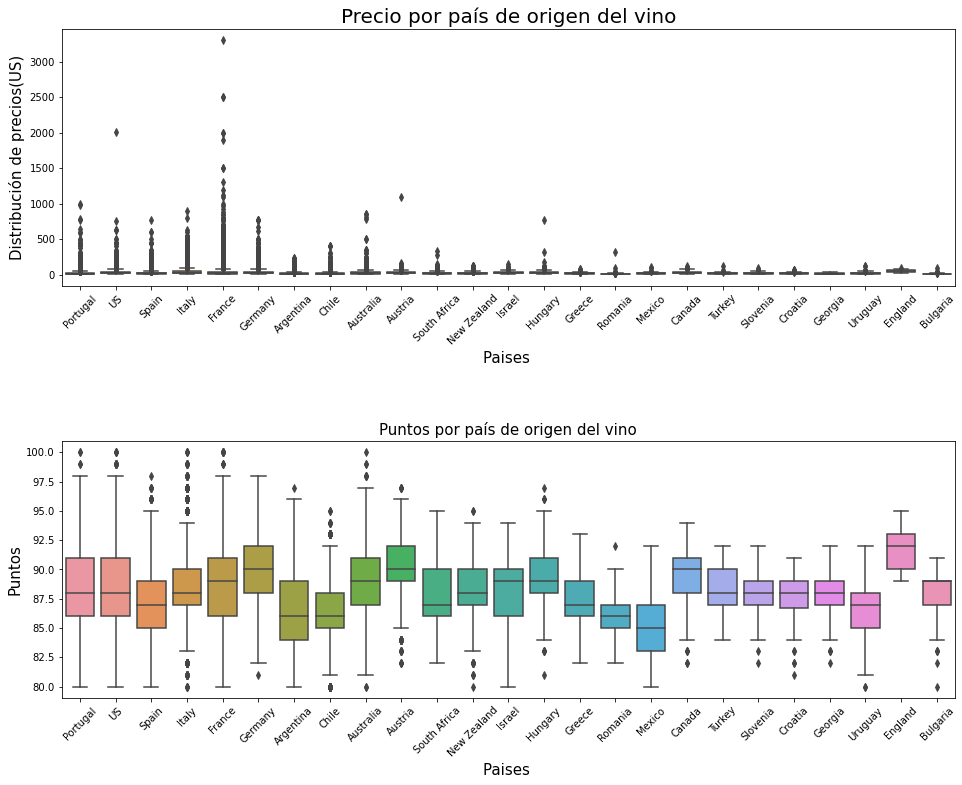

In [46]:




plt.subplot(2,1,1)
g = sns.boxplot(x='country', y='price',
                  data=data.loc[(data.country.isin(country.index.values))])
g.set_title("Precio por país de origen del vino", fontsize=20)
g.set_xlabel("Paises ", fontsize=15)
g.set_ylabel("Distribución de precios(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='country', y='points',
                   data=data[data.country.isin(country.index.values)])
g1.set_title("Puntos por país de origen del vino", fontsize=15)
g1.set_xlabel("Paises ", fontsize=15)
g1.set_ylabel("Puntos", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

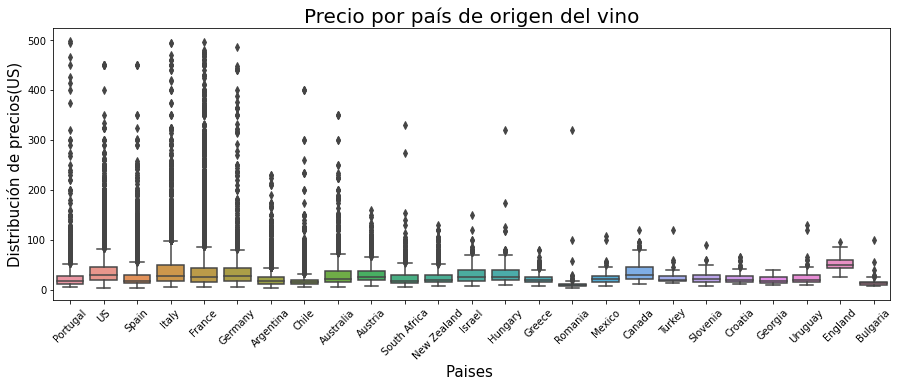

In [47]:
plt.figure(figsize=(15,5))
g = sns.boxplot(x='country', y='price',
                  data=data.loc[(data.country.isin(country.index.values))  &
                                    (data.price < 500)])
g.set_title("Precio por país de origen del vino", fontsize=20)
g.set_xlabel("Paises ", fontsize=15)
g.set_ylabel("Distribución de precios(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

Es muy interesante que todos los vinos tengan cuartiles en valores inferiores a 100

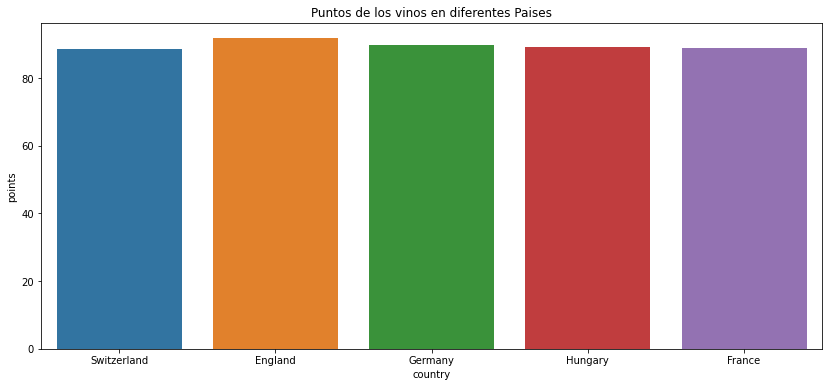

In [23]:
#Pero tenemoss que tener en cuenta que el precio no tiene que ir de la mano con la puntuación por lo tanto hacemos un grafico de barras por puntuación de los paises
plt.figure(figsize = (14,6))
plt.title('Puntos de los vinos en diferentes Paises')
sns.set_color_codes("pastel")
sns.barplot(x = 'country', y="points", data=z.head(5))
locs, labels = plt.xticks()
plt.show()

La media de puntos mas altos corresponde a Inglaterra.
Esto se deve a que la mayoria de los catadores de vinos proceden de Inglaterra

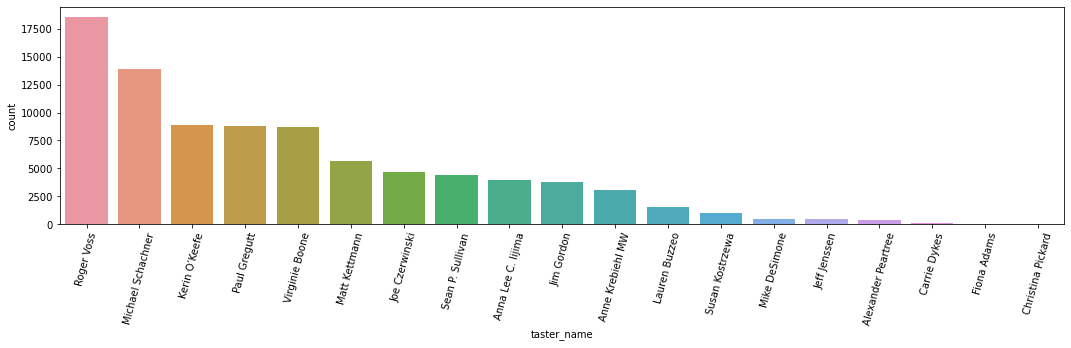

In [27]:
fig = plt.figure(1, (18, 4))

ax1 = plt.subplot(1,1,1)
sns.countplot(data=data,x='taster_name', order=data['taster_name'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)

plt.show()

Como podemos observar o catador de viños do que masi datos hay e Roger Voss con unha diferencia co segundo de unhos 2500 viños

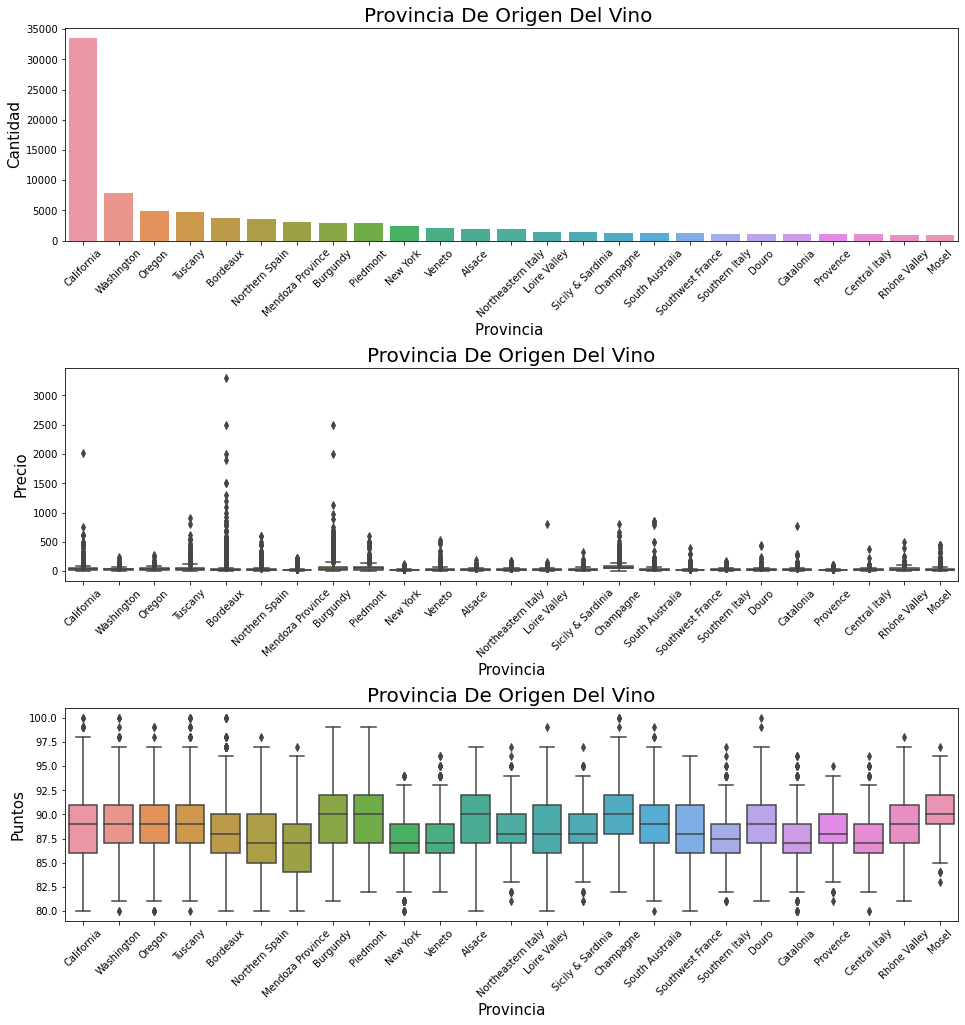

In [88]:
plt.figure(figsize=(16,16))

province = data.province.value_counts()[:25]

plt.subplot(3,1,1)
g = sns.countplot(x='province', 
                  data=data.loc[(data.province.isin(province.index.values))],
                  order=data['province'].value_counts().index[:25])
g.set_title("Provincia De Origen Del Vino ", fontsize=20)
g.set_xlabel("Provincia ", fontsize=15)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price', x='province',
                  data=data.loc[(data.province.isin(province.index.values))],
                  order=data['province'].value_counts().index[:25])

g1.set_title("Provincia De Origen Del Vino", fontsize=20)
g1.set_xlabel("Provincia", fontsize=15)
g1.set_ylabel("Precio", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='province',
                  data=data.loc[(data.province.isin(province.index.values))],
                  order=data['province'].value_counts().index[:25])
g2.set_title("Provincia De Origen Del Vino", fontsize=20)
g2.set_xlabel("Provincia", fontsize=15)
g2.set_ylabel("Puntos", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

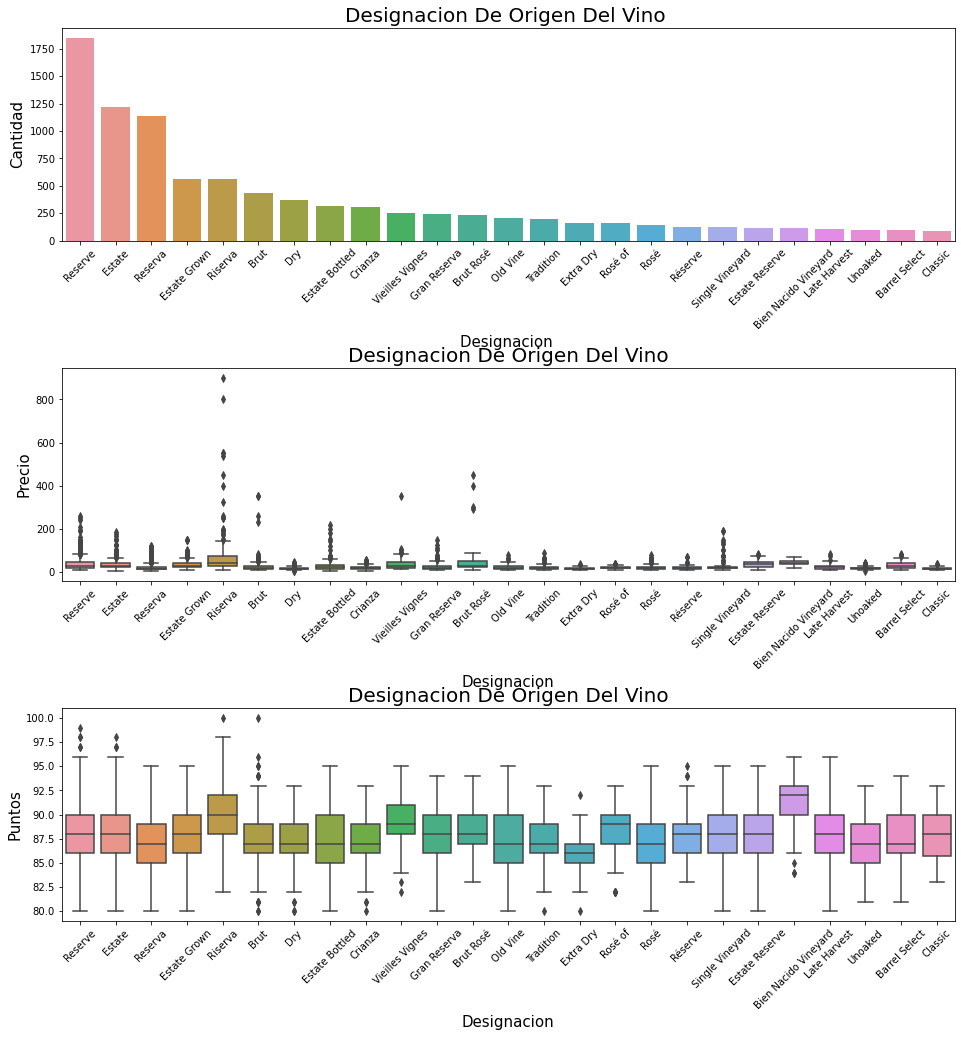

In [87]:
plt.figure(figsize=(16,16))

designation = data.designation.value_counts()[:25]

plt.subplot(3,1,1)
g = sns.countplot(x='designation', 
                  data=data.loc[(data.designation.isin(designation.index.values))],
                  order=data['designation'].value_counts().index[:25])
g.set_title("Designacion De Origen Del Vino ", fontsize=20)
g.set_xlabel("Designacion ", fontsize=15)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price', x='designation',
                  data=data.loc[(data.designation.isin(designation.index.values))],
                  order=data['designation'].value_counts().index[:25])
g1.set_title("Designacion De Origen Del Vino", fontsize=20)
g1.set_xlabel("Designacion", fontsize=15)
g1.set_ylabel("Precio", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='designation',
                  data=data.loc[(data.designation.isin(designation.index.values))],
                  order=data['designation'].value_counts().index[:25])
g2.set_title("Designacion De Origen Del Vino", fontsize=20)
g2.set_xlabel("Designacion", fontsize=15)
g2.set_ylabel("Puntos", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

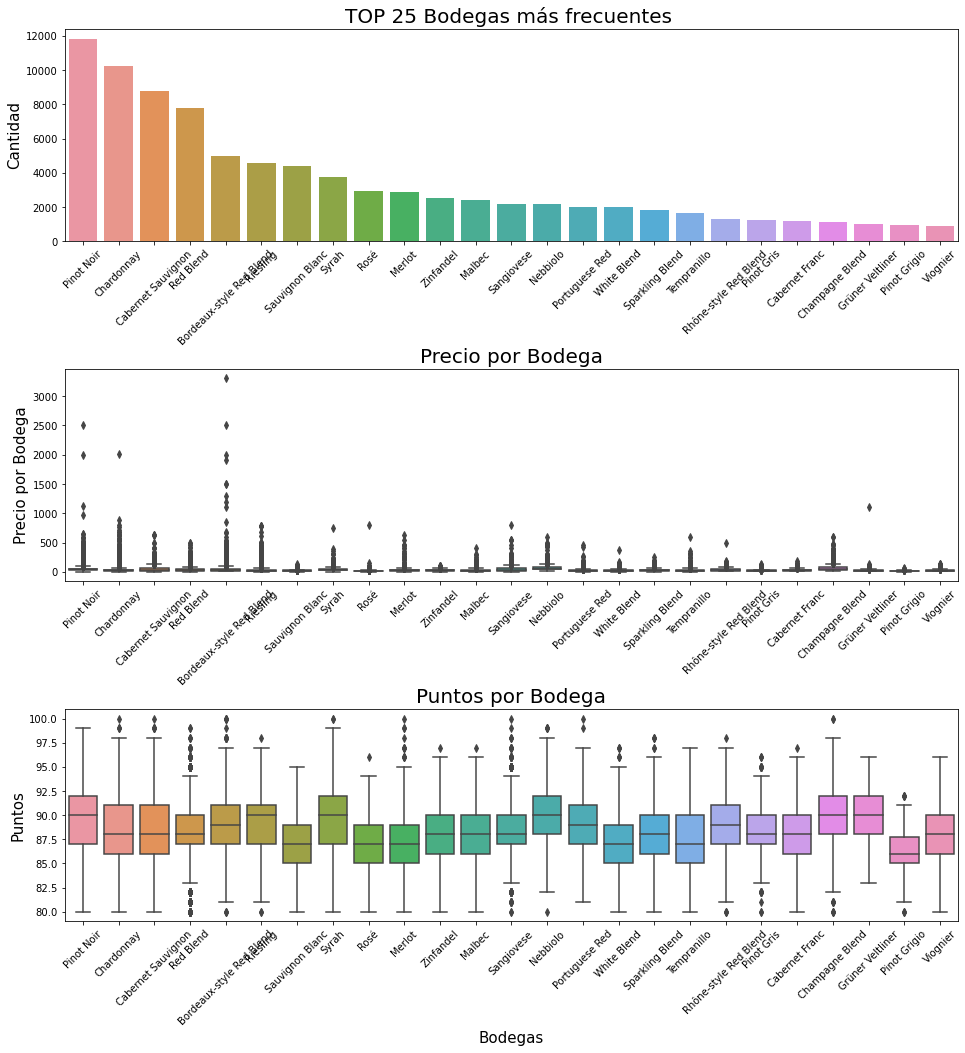

In [89]:
plt.figure(figsize=(16,16))

variety = data.variety.value_counts()[:25]

plt.subplot(3,1,1)
g = sns.countplot(x='variety', 
                  data=data.loc[(data.variety.isin(variety.index.values)) ],
                  order=data['variety'].value_counts().index[:25])
g.set_title("TOP 25 Bodegas más frecuentes ", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price', x='variety',
                  data=data.loc[(data.variety.isin(variety.index.values))],
                  order=data['variety'].value_counts().index[:25])
g1.set_title("Precio por Bodega", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Precio por Bodega", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='variety',
                  data=data.loc[(data.variety.isin(variety.index.values))],
                  order=data['variety'].value_counts().index[:25])
g2.set_title("Puntos por Bodega", fontsize=20)
g2.set_xlabel("Bodegas", fontsize=15)
g2.set_ylabel("Puntos", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()